## Get the Data

In the following cells we download and save the [S&P 500 dataset](https://en.wikipedia.org/wiki/List_of_S%26P_500_companies).

   **Step 1 :** Define a function to get historical data from google finance

In [15]:
import pandas as pd
import datetime

# def get_historical_data(symbol,start_date,end_date):
#     ''' Daily quotes from Google. Date format='yyyy-mm-dd' '''
#     symbol = symbol.upper()
#     start = datetime.date(int(start_date[0:4]), int(start_date[5:7]), int(start_date[8:10]))
#     end = datetime.date(int(end_date[0:4]), int(end_date[5:7]), int(end_date[8:10]))
#     url_string = "http://www.google.com/finance/historical?q={0}".format(symbol)
#     url_string += "&startdate={0}&enddate={1}&num={0}&ei=KKltWZHCBNWPuQS9147YBw&output=csv".format(start.strftime('%b%d,%Y'), end.strftime('%b%d,%Y'),4000)
    
#     col_names = ['Date','Open','High','Low','Close','Volume']
#     stocks = pd.read_csv(url_string, header=0, names=col_names, sep='delimiter') 
    
#     df = pd.DataFrame(stocks)
#     return df

 **Step 2:** get the data of desired firm from [Google Finance](http://www.google.com/finance).

In [ ]:
# data = get_historical_data('GOOGL','2005-01-01','2017-06-30') # from January 1, 2005 to June 30, 2017

**Step 3:** Write the data to a csv file.

In [ ]:
data.to_csv('google.csv',index = False)

# Check Point #1

This is my first checkpoint. The data has been saved to disk.

## Preprocess the data

Now it is time to preprocess the data. In the following cells we will normalise it for better prediction of data.

**Step 1 :** Get the data from csv file.

In [28]:
import pandas as pd
import numpy as np

data = pd.read_csv('RELIANCE_large.csv')
print(data.head())

print("\n")
print("Open   --- mean :", np.mean(data['Open']),  "  \t Std: ", np.std(data['Open']),  "  \t Max: ", np.max(data['Open']),  "  \t Min: ", np.min(data['Open']))
print("High   --- mean :", np.mean(data['High']),  "  \t Std: ", np.std(data['High']),  "  \t Max: ", np.max(data['High']),  "  \t Min: ", np.min(data['High']))
print("Low    --- mean :", np.mean(data['Low']),   "  \t Std: ", np.std(data['Low']),   "  \t Max: ", np.max(data['Low']),   "  \t Min: ", np.min(data['Low']))
print("Close  --- mean :", np.mean(data['Close']), "  \t Std: ", np.std(data['Close']), "  \t Max: ", np.max(data['Close']), "  \t Min: ", np.min(data['Close']))
print("Volume --- mean :", np.mean(data['Volume']),"  \t Std: ", np.std(data['Volume']),"  \t Max: ", np.max(data['Volume']),"  \t Min: ", np.min(data['Volume']))


         Date        Open        High         Low       Close   Adj Close  \
0  2012-01-02  345.128540  351.542725  340.348846  349.957764  322.067139   
1  2012-01-03  352.780975  360.037201  351.839905  358.922760  330.317566   
2  2012-01-04  360.284851  362.043182  353.325836  354.712677  326.443115   
3  2012-01-05  354.143066  359.071350  343.791199  346.465851  318.853516   
4  2012-01-06  345.252350  358.600830  345.054230  355.406097  327.081238   

       Volume  
0   8679938.0  
1   9455771.0  
2   8557084.0  
3  13364666.0  
4   9495456.0  


Open   --- mean : 1073.9245620383338   	 Std:  754.558694910201   	 Max:  2856.149902   	 Min:  334.330872
High   --- mean : 1086.1413654780686   	 Std:  762.9708575509039   	 Max:  2856.149902   	 Min:  338.194244
Low    --- mean : 1061.213281612606   	 Std:  745.6412844281149   	 Max:  2786.100098   	 Min:  333.365021
Close  --- mean : 1073.1809782351638   	 Std:  753.9688180702522   	 Max:  2819.850098   	 Min:  334.875702
Volume --

**Step 2 :** Remove Unncessary data, i.e., Date and High value

In [29]:
import preprocess_data as ppd
stocks = ppd.remove_data(data)

#Print the dataframe head and tail
print(stocks.head())
print("---")
print(stocks.tail())

   Item         Open        Close     Volume
0     0  2545.100098  2547.199951  3364092.0
1     1  2527.000000  2543.300049  3198493.0
2     2  2538.000000  2544.449951  3442509.0
3     3  2530.000000  2544.699951  2659749.0
4     4  2514.750000  2524.050049  2764496.0
---
      Item        Open       Close      Volume
2714  2714  345.252350  355.406097   9495456.0
2715  2715  354.143066  346.465851  13364666.0
2716  2716  360.284851  354.712677   8557084.0
2717  2717  352.780975  358.922760   9455771.0
2718  2718  345.128540  349.957764   8679938.0


**Step 2: ** Visualise raw data.

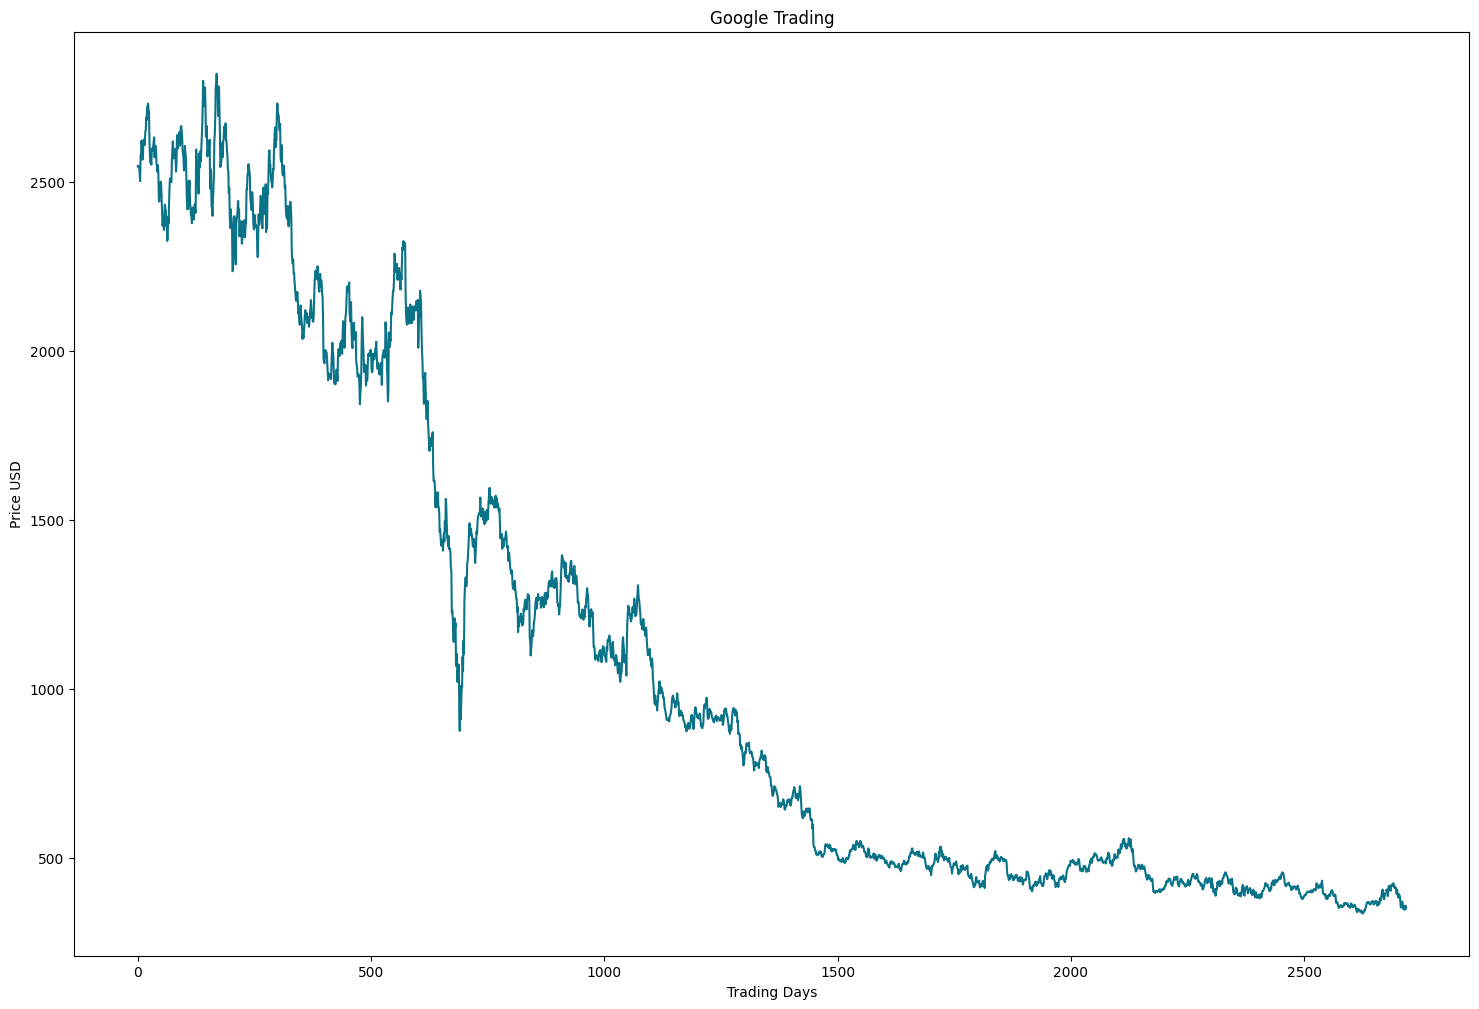

In [30]:
import visualize

visualize.plot_basic(stocks)

**Step 3 :** Normalise the data using minmaxscaler function

In [31]:
stocks = ppd.get_normalised_data(stocks)
print(stocks.head())

print("\n")
print("Open   --- mean :", np.mean(stocks['Open']),  "  \t Std: ", np.std(stocks['Open']),  "  \t Max: ", np.max(stocks['Open']),  "  \t Min: ", np.min(stocks['Open']))
print("Close  --- mean :", np.mean(stocks['Close']), "  \t Std: ", np.std(stocks['Close']), "  \t Max: ", np.max(stocks['Close']), "  \t Min: ", np.min(stocks['Close']))
print("Volume --- mean :", np.mean(stocks['Volume']),"  \t Std: ", np.std(stocks['Volume']),"  \t Max: ", np.max(stocks['Volume']),"  \t Min: ", np.min(stocks['Volume']))

   Item      Open     Close    Volume
0     0  0.876657  0.890281  0.051088
1     1  0.869479  0.888711  0.048574
2     2  0.873841  0.889174  0.052279
3     3  0.870669  0.889274  0.040392
4     4  0.864622  0.880965  0.041983


Open   --- mean : 0.2932778606394821   	 Std:  0.29921207110178755   	 Max:  0.9999999999999998   	 Min:  0.0
Close  --- mean : 0.29710780015423705   	 Std:  0.30341110125073983   	 Max:  1.0   	 Min:  0.0
Volume --- mean : 0.12844707111372416   	 Std:  0.09135041359157627   	 Max:  1.0   	 Min:  0.0


**Step 4 :** Visualize the data again

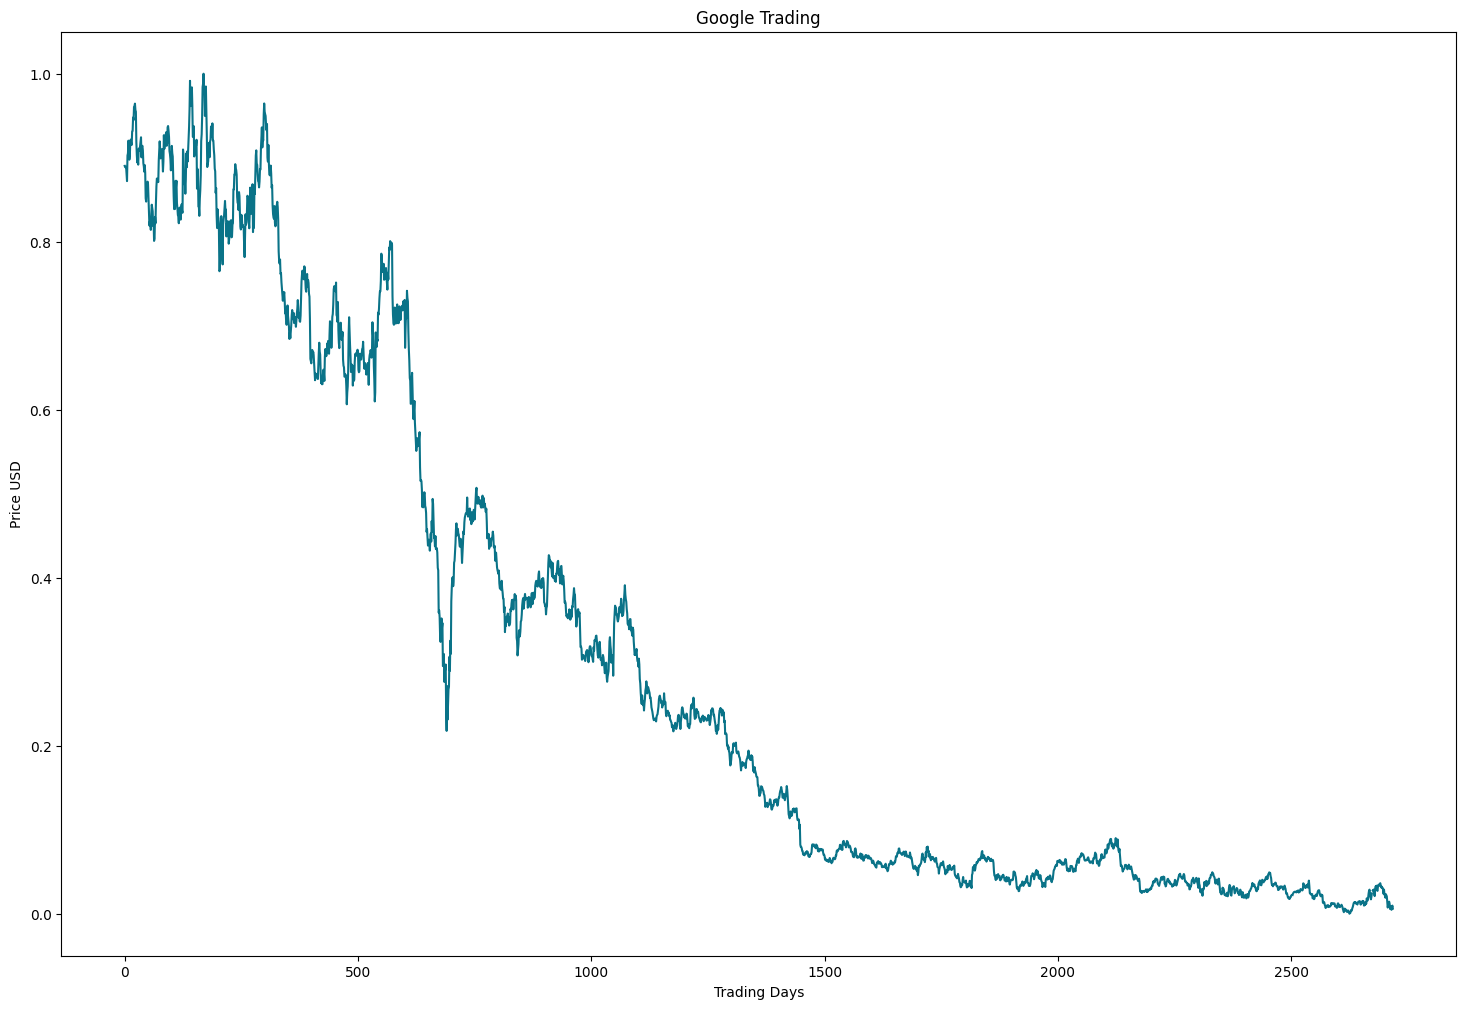

In [32]:
visualize.plot_basic(stocks)

**Step 5:** Log the normalised data for future resuablilty

In [33]:
stocks.to_csv('reliance_preprocessed.csv',index= False)

# Check Point #2

This is my second checkpoint. The preprocessed data has been saved to disk.

## Bench Mark Model

In this section we will check our bench mark model. As is proposed in my proposal my bench mark model is a simple linear regressor model. 

**Step 1:** Load the preprocessed data

In [22]:
import math
import pandas as pd
import numpy as np
from IPython.display import display
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import TimeSeriesSplit

import visualize as vs
import stock_data as sd
import LinearRegressionModel

stocks = pd.read_csv('google_preprocessed.csv')
display(stocks.head())

Item      Open     Close    Volume
0     0  0.012051  0.015141  0.377248
1     1  0.014198  0.010658  0.325644
2     2  0.009894  0.010112  0.189820
3     3  0.010874  0.007407  0.242701
4     4  0.008368  0.010298  0.224905

**Step 2:** Split data into train and test pair

In [23]:
X_train, X_test, y_train, y_test, label_range= sd.train_test_split_linear_regression(stocks)

print("x_train", X_train.shape)
print("y_train", y_train.shape)
print("x_test", X_test.shape)
print("y_test", y_test.shape)

x_train (2155, 1)
y_train (2155, 1)
x_test (990, 1)
y_test (990, 1)


**Step 3:** Train a Linear regressor model on training set and get prediction

In [24]:
model = LinearRegressionModel.build_model(X_train,y_train)

**Step 4:** Get prediction on test set

In [ ]:
predictions = LinearRegressionModel.predict_prices(model,X_test, label_range)

**Step 5:** Plot the predicted values against actual

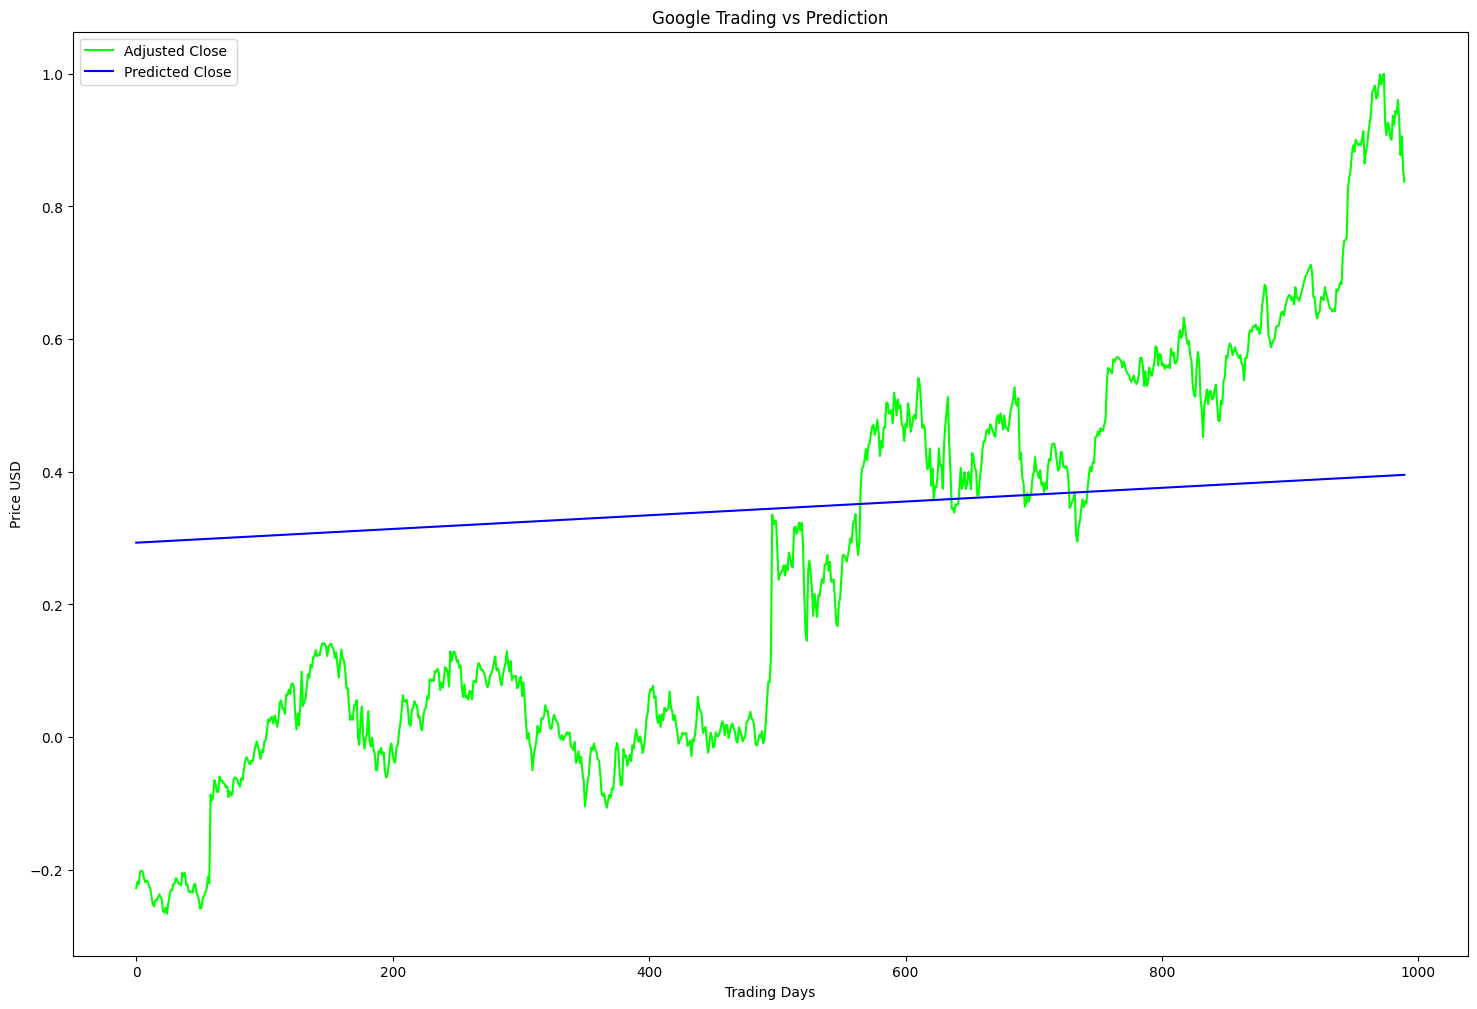

In [ ]:
vs.plot_prediction(y_test,predictions)

**Step 6:** measure accuracy of the prediction

In [ ]:
trainScore = mean_squared_error(X_train, y_train)
print('Train Score: %.4f MSE (%.4f RMSE)' % (trainScore, math.sqrt(trainScore)))

testScore = mean_squared_error(predictions, y_test)
print('Test Score: %.8f MSE (%.8f RMSE)' % (testScore, math.sqrt(testScore)))

Train Score: 0.1852 MSE (0.4303 RMSE)
Test Score: 0.08133781 MSE (0.28519784 RMSE)


# Checkpoint #3


## Long-Sort Term Memory Model

In this section we will use LSTM to train and test on our data set.

### Basic LSTM Model

First lets make a basic LSTM model.

**Step 1 :** import keras libraries for smooth implementaion of lstm 

In [78]:
import math
import pandas as pd
import numpy as np
from IPython.display import display

from tensorflow.keras.layers import Dense, Activation, Dropout
from tensorflow.keras.layers import LSTM
from tensorflow.keras.models import Sequential
from tensorflow.keras.metrics import mean_squared_error
# from tensorflow.keras.optimizers import SGD, Adam
from tensorflow.keras.optimizers.legacy import SGD
from sklearn.model_selection import StratifiedKFold

import lstm, time #helper libraries

import visualize as vs
import stock_data as sd
import LinearRegressionModel

stocks = pd.read_csv('reliance_preprocessed.csv')
stocks_data = stocks.drop(['Item'], axis =1)

display(stocks_data.head())

Open     Close    Volume
0  0.876657  0.890281  0.051088
1  0.869479  0.888711  0.048574
2  0.873841  0.889174  0.052279
3  0.870669  0.889274  0.040392
4  0.864622  0.880965  0.041983

**Step 2 :** Split train and test data sets and Unroll train and test data for lstm model

In [36]:
X_train, X_test,y_train, y_test = sd.train_test_split_lstm(stocks_data, 5)

unroll_length = 50
X_train = sd.unroll(X_train, unroll_length)
X_test = sd.unroll(X_test, unroll_length)
y_train = y_train[-X_train.shape[0]:]
y_test = y_test[-X_test.shape[0]:]

print("x_train", X_train.shape)
print("y_train", y_train.shape)
print("x_test", X_test.shape)
print("y_test", y_test.shape)

x_train (2163, 50, 3)
y_train (2163,)
x_test (446, 50, 3)
y_test (446,)


**Step 3 :** Build a basic Long-Short Term Memory model

In [73]:
# build basic lstm model
model = lstm.build_basic_model(input_dim = X_train.shape[-1],output_dim = unroll_length, return_sequences=True)

# Compile the model
start = time.time()
# model.compile(loss='mse', optimizer='adam')
model.compile(loss='mse', optimizer=SGD(lr=1e-3))
print('compilation time : ', time.time() - start)

compilation time :  0.011597871780395508


c:\Python310\lib\site-packages\keras\optimizers\legacy\gradient_descent.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


**Step 4:** Train the model

In [ ]:
model.fit(
    X_train,
    y_train,
    epochs=1,
    validation_split=0.05)

Train on 2459 samples, validate on 130 samples
Epoch 1/1
2459/2459 [==============================] - 44s - loss: 0.0032 - val_loss: 3.3625e-04


**Step 5:** make prediction using test data

In [43]:
predictions = model.predict(X_test)

14/14 [==============================] - 0s 26ms/step


**Step 6:** Plot the results

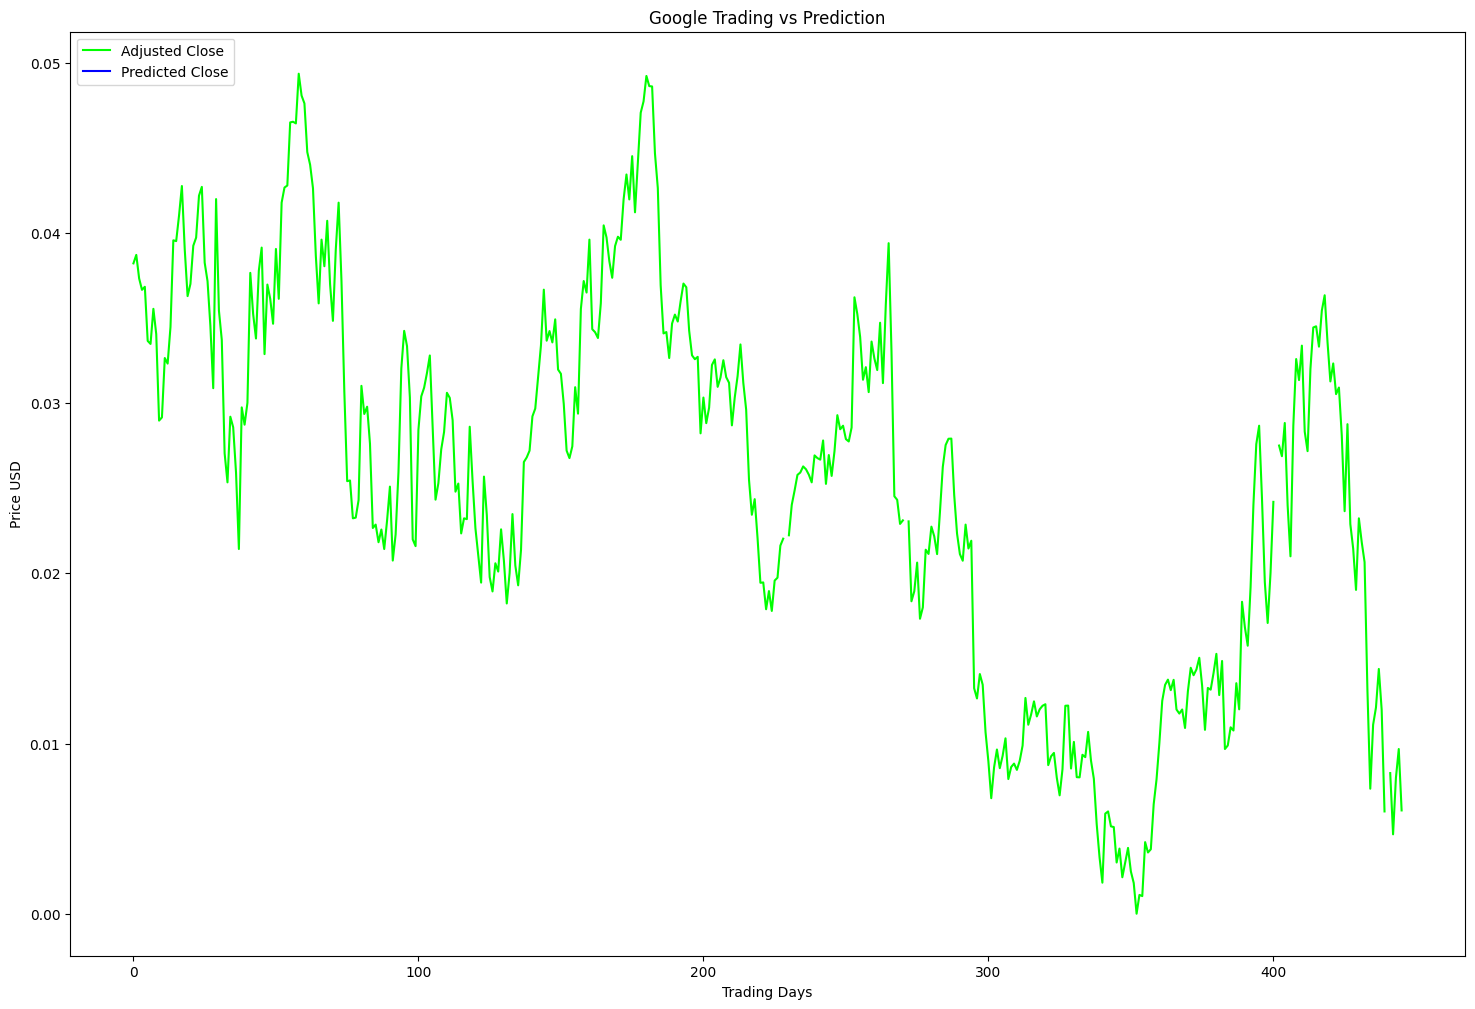

In [79]:
vs.plot_lstm_prediction(y_test,predictions)

** Step 7:** Get the test score.

In [ ]:
trainScore = model.evaluate(X_train, y_train, verbose=0)
print('Train Score: %.8f MSE (%.8f RMSE)' % (trainScore, math.sqrt(trainScore)))

testScore = model.evaluate(X_test, y_test, verbose=0)
print('Test Score: %.8f MSE (%.8f RMSE)' % (testScore, math.sqrt(testScore)))

Train Score: 0.00035862 MSE (0.01893715 RMSE)
Test Score: 0.00109616 MSE (0.03310835 RMSE)


### Improved LSTM Model

**Step 1: ** Build an improved LSTM model

In [81]:
# Set up hyperparameters
batch_size = 100
epochs = 5

# build improved lstm model
model = lstm.build_improved_model( X_train.shape[-1],output_dim = unroll_length, return_sequences=True)

start = time.time()
#final_model.compile(loss='mean_squared_error', optimizer='adam')
# model.compile(loss='mse', optimizer='adam')
model.compile(loss="mse", optimizer="adam")

print('compilation time : ', time.time() - start)

compilation time :  0.003990650177001953


**Step 2: ** Train improved LSTM model

In [ ]:
model.fit(X_train, 
          y_train, 
          batch_size=batch_size,
          epochs=epochs,
          verbose=2,
          validation_split=0.05
         )

Train on 2459 samples, validate on 130 samples
Epoch 1/5
36s - loss: 0.0078 - val_loss: 7.8077e-04
Epoch 2/5
28s - loss: 9.4908e-04 - val_loss: 9.9577e-04
Epoch 3/5
27s - loss: 7.8394e-04 - val_loss: 3.1191e-04
Epoch 4/5
27s - loss: 6.9765e-04 - val_loss: 3.4707e-04
Epoch 5/5
27s - loss: 6.4507e-04 - val_loss: 2.8518e-04


**Step 3:** Make prediction on improved LSTM model

In [48]:
# Generate predictions 
predictions = model.predict(X_test, batch_size=batch_size)

5/5 [==============================] - 1s 52ms/step


**Step 4:** plot the results

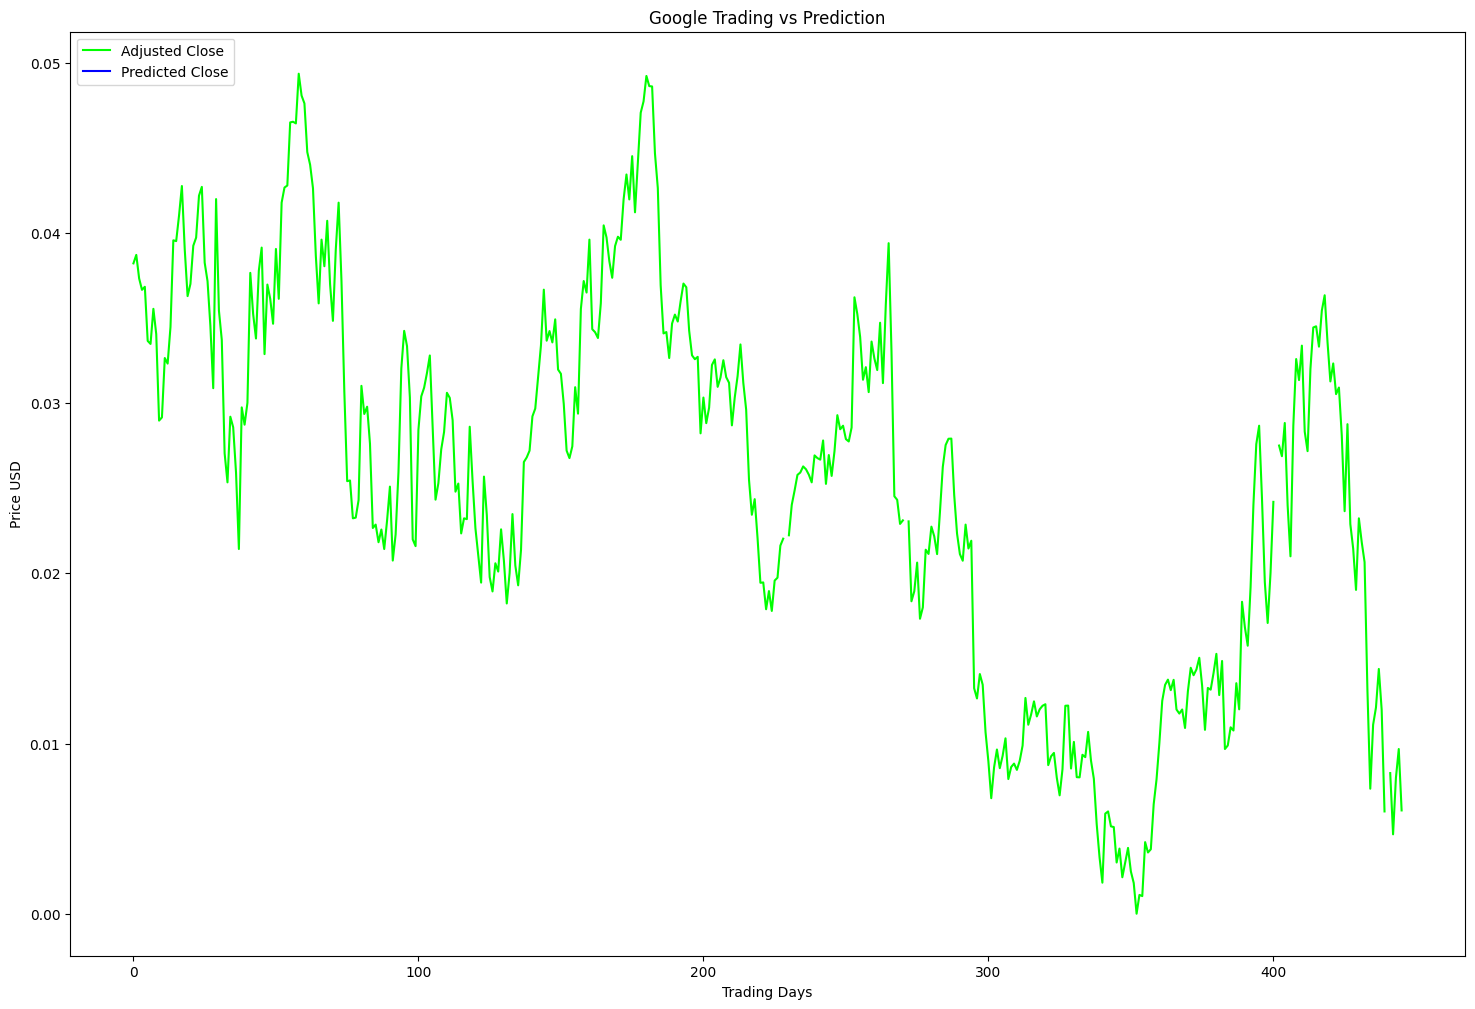

In [49]:
vs.plot_lstm_prediction(y_test,predictions)

**Step 5:** Get the test score

In [ ]:
trainScore = model.evaluate(X_train, y_train, verbose=0)
print('Train Score: %.8f MSE (%.8f RMSE)' % (trainScore, math.sqrt(trainScore)))

testScore = model.evaluate(X_test, y_test, verbose=0)
print('Test Score: %.8f MSE (%.8f RMSE)' % (testScore, math.sqrt(testScore)))

Train Score: 0.00031550 MSE (0.01776241 RMSE)
Test Score: 0.00099105 MSE (0.03148098 RMSE)


In [ ]:
range = [np.amin(stocks_data['Close']), np.amax(stocks_data['Close'])]

#Calculate the stock price delta in $

true_delta = testScore*(range[1]-range[0])
print('Delta Price: %.6f - RMSE * Adjusted Close Range' % true_delta)    

Delta Price: 0.000991 - RMSE * Adjusted Close Range


# Checking Robustness of the model

In this section we will check robustness of our LSTM model. I have used new unseen datasets for this from July 1, 2017 to July 20,2017. I have downloaded the data sets from google finance website to check for robustness of the model.

In [ ]:
import preprocess_data as ppd

data = pd.read_csv('RELIANCE_large.csv')

stocks = ppd.remove_data(data)

stocks = ppd.get_normalised_data(stocks)

stocks = stocks.drop(['Item'], axis = 1)
#Print the dataframe head and tail
print(stocks.head())

X = stocks[:].as_matrix()
Y = stocks[:]['Close'].as_matrix()

X = sd.unroll(X,1)
Y = Y[-X.shape[0]:]

print(X.shape)
print(Y.shape)

# Generate predictions 
predictions = model.predict(X)

#get the test score
testScore = model.evaluate(X, Y, verbose=0)
print('Test Score: %.4f MSE (%.4f RMSE)' % (testScore, math.sqrt(testScore)))

       Open     Close    Volume
0  0.123901  0.000000  0.606442
1  0.000000  0.174601  1.000000
2  0.010989  0.112263  0.921928
3  0.093132  0.291229  0.575381
4  0.243819  0.430228  0.366556
(12, 1, 3)
(12,)
Test Score: 0.3842 MSE (0.6198 RMSE)
